In [31]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    
    '''
    x_axis=['neg','neu','pos']
    y_axis=[0,0,0]
    scatter_x=[]
    scatter_y=[]
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = '4ZxLjoXxV5dIZAmfmUWZWqT9i'
        consumer_secret = 'RIY3gxKtQiTIs87MmqShBHixd1jdaIiHR18pZc2xZMv3U9WXsg'
        access_token = '1339638829607657472-lfx713UxZgxsH9OxBVzyKDKDe19UFJ'
        access_token_secret = 'pxSINy8RJ7Mcs3E9yHcWXPqRBjJaQigMJIfNyK3lySNdF'
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, 
                                     consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, 
                                       access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, 
        special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            self.y_axis[2]+=1
            self.scatter_x.append(analysis.sentiment.polarity)
            self.scatter_y.append('pos')
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            self.y_axis[1]+=1
            self.scatter_x.append(analysis.sentiment.polarity)
            self.scatter_y.append('neu')
            return 'neutral'
        else:
            self.y_axis[0]+=1
            self.scatter_x.append(analysis.sentiment.polarity)
            self.scatter_y.append('neg')
            return 'negative'
        
    def getSentiment(self,fetched_tweets):
        tweets = []
        translator=Translator()
        try:
            for tweet in fetched_tweets:
                
                #Bilangual Translation to english
                sent=tweet
                #sent=str(sent.encode('unicode-escape').decode('ASCII'))
                translations = translator.translate(sent,dest="en")
                transtweet=translations.text
                cleantweet = self.clean_tweet(transtweet)
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}

                # saving text of tweet
                parsed_tweet['text'] =  cleantweet
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(cleantweet)

                # appending parsed tweet to tweets list

                tweets.append(parsed_tweet)

            # return parsed tweets
            return tweets
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
        translator=Translator()
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query,
                                             count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                
                #Bilangual Translation to english
                sent=tweet.text
                sent=str(sent.encode('unicode-escape').decode('ASCII'))
                translations = translator.translate(sent,dest="en")
                transtweet=translations.text
                cleantweet = self.clean_tweet(transtweet)
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] =  cleantweet
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(cleantweet)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

    def plotgraph(self):

        pos=np.column_stack((self.scatter_x, self.scatter_y))
        pd.DataFrame(pos).to_csv('pos.csv')
        bar_graph=plt.figure(1)

        plt.bar(self.x_axis,self.y_axis)
        scatter_plot=plt.figure(2)
        plt.scatter(self.scatter_x,self.scatter_y)

        plt.title("Twitter Sentiment Analysis")
        plt.show()

In [32]:
api = TwitterClient()

# Get tweet Sentiment and accuracy



In [33]:
#tweets = api.get_tweets(query = "@Officialneha", count =500)

In [86]:
df=pd.read_csv('test/test.csv')
tweets=api.getSentiment(df.tweet)

In [94]:
for tweet in df.tweet:
    print(tweet)

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  bihday your majesty
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
 factsguide: society now    #motivation
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
 @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl
we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
 @user @user welcome here !  i'm   it's so #gr8 ! 
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
we are so selfish. #orlando #standwith

 the most #powerful #brave #angering   #hopeful thing i have read in a very very long time
cleaned up my notifications.   
finishing the night having a good "catchup" with a guy u have fancied for 7/8years!   ðð
some can confirm this ððð  #goodmorning #africa   #weekend #smilesâ¦ 
now playing  :  naoyuki onda - " temple in the twilight" on     music song 
  #friday #parisianbreakfast! today featuring our freshly #brewed double expresso &amp; ourâ¦ 
 @user goddamn it. 
@user  you are with a lying cheating career criminal#hope she is in prison#u forget about fbi
@user we're so   for #pokemonsunandmoon too! #dreamscometrue #pokemon
no one but you can make you   #quote 
when you with he was here for you an understand what's goin on  instead of makeing enemes  #hu#standbymyself#
 @user what bitches need to do is goto back to school , dropping out to lay with niggas ðð­ð­ðð©  !!
you can't drink all day if you don't sta in the morning."  enjoy happy hours  times  

shut up rat 
 @user so many sycophants.....  
 in the #gop #deplorable i have seen many "conservative" memes over the last 8 years #notfunny @user 
4 #days on a #wohwhile #production next #week so #pretty chuffed (   )! about that. #lifetime in #acting terms! pay the #milkman gd
a mother can take care of ten children but sometimes ten children can't take care of mother.  
my cat is bery afraid of my shoes today... huh... ðð #cat #shoes #afraid #weird #lol #funny   #strange #lovehim
ladies and gentlemen it is time! stream will strat in a few!! #doom #twitch   #letsplaylive #letsgo
go to bed, heaache. wake up, heaache.   #summeime sadness
 @user on our way to meet students from @user and @user to board a coach to @user   #faith #community
be alrigth ð¬ðð #arianagrande #bitch #mood #girly #love #goal #lgbt   #daily
only the good stuff: multivitamins for your weekend [06.11.16]   
i wasn't aware facebook was a legislature. 
 new tunes coming soon. #music #soundcloud #acoustic

  #family on the #laketrasimeno #justintuscany #umbria #italy #daytrip #vacationsâ¦ 
wedding day #marie&amp;marco #ladesirade  #guadeloupe #temoin   
 @user lots of ppl getting the wrong impression of #jocoxmp .not surprised as things will be spin for political gain.  
twitter mentions for the tavern at phipps:  -  @user happy friday!! #lunchtime   #atlanta #phippsplaza...
i've decided to be  ! @user #health #animals #pets #leadership #inspiration #quote  @user 
so very excited!! #love #lifeisgreat   #blessed #luckygirl
countdown ðâï¸ð¸ð¹  #sun #mallorca #relax #kids 
 @user   to speak with @user  tomorrow at @user #b2b #ecommerce #event 
@user @user you ladies are all successful living in manhattan - who cares if she approves or is so mean  life
@user good to see the blues still obsessed.  
off to see @user in bristol tonight! @user  
can't wait to check out @user on #sexcam.   #skyprivate 
#tvtdisaster #saturday #relax   #love to all 
work  #freestyle#hair#hairstyle#hairdr

50 dead now ?   . #orlando
regram @user wall street, nyc  #newyork #nyc #amazing #beautiful #place #travel #nice #cool #fun  ... 
#wedding anniversary #23years   married life to my mom and dad 
  keeping chickens and consumers happy: when i die, i want to come back as an organic chicken. okay, not... 
#fridayfeeling #fridaythoughts #realtalk from @user #shideism have a #blessed day #teamshide and be   ðð½ð 
 @user i don't always agree with @user but when i do, i drink dos equis. stay   my friend.
atk porn pics  representations of women in men's alcohol ads 
 @user my oil painting by r.sequeira #abstracta #a   #red #canvas @user @user @user #bbc 
#dreamcatcher   bull up: you will dominate your bull and you will direct it whatever you want it to do. when 
@user oh #god sneha you are looking   in this photo....i can't see u sad even in a photo
 @user   challenges #aap's claim that 70% #punjabis are #drugaddicts, dares it to prove   
@user weee   haha
a sneak peak of a new upcoming

 @user #stephcurry's outburst begs the question: can christians get  ? #nbafinals 
having an #idealpaner doesn't mean you'll be   - what's out there?  (via @user 
does anyone know what @user 's plans are for this race anymore?    #runner #tiffany
tomorrow i will be tackling the move from laptop to macbook #delivery   #technology #apple #sync wish me luck!
to all the #awesome hardworking dads who celebrate    #fathersday today  "they worked in a giant metal man' 
i wish i can stop hiding who i am, it's hard for people not to know. it's hard to show them that no matter what, i am still me.  
 @user @user sorry for the pain and anguish this has brought to your area   #orlandostrong #orlando
going to the cinema tonight with @user (who probs just knows its about magicians) to see the new #nowyouseeme2 movie!  
on the bright side thoughh..... wedding dress appt saturday!!! ððð°ð½  
#tattoosleeves   gorilla simulator: you need to do to adapt to the environment. the need to tear the 

#carnevaleadelaide #maskedball suppoing #agedcare programs.  they're a noisy,   lot. 
posing...  #june #wednesday #night #friends   #pay #elegant #girl #pretty #beautiful #boyâ¦ 
islam gave them a purpose in life but they left islam so now their purpose in life is to defame islam #useless  ð 
@user @user they need to get paid better they made the law for a reason &amp; dana hired a team of lawyers to oveurn it  
finally at the point where i have to keep my packed hospital bag in the care. just in case. t-31 days.   ð£ð¶ðâ¤ï¸
 people spit on the face of #god 
  sea shepherd suppoers are racist!  #seashepherd    #antiracism
 @user homayged @user here we go again!!! ð ð ð   #ptxworldtour
 @user   #memorialdayweekend to all #enjoy &amp; stay safe 
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
  &amp; #grateful that #money comes to me in #increasing quantities from #multiple sources on a #continuous basis 
#cat #kitty   sandy:
#

#americanhustle   gorilla simulator: you need to do to adapt to the environment. the need to tear the city. 
73-9 ain't mean a thing without a ring.  
it is really good to be a father. atleast one person can be trained by me to be a good human being.  jai hind :) 
it's sad at how many drunk people there are at #cmafest2016   they are missing a great show and they'll never remember it!  
@user obama is utilizing a terrorist attack that killed 50 americans to push his own agenda.  
i am thankful for my parents. #thankful #positive     
ok just 1 day left to enter #euro2016  piranaship @user  Â£20 entry winner gets Â£500 ð   
i am special. #i_am #positive #affirmation     
#amarinder destroyed #sugarcane industry in #punjab by closing down 5 co-op mills:   
we have an announcement coming soon ... here's a hint! ðð   #thebestteam 
feeling   and   after so many days. #countdown #beautifulbangalore
@user @user oh, forgot:  
@user pretty bummed i waited 4 hours to see one skit today.

i will not be outworked today. #success #motivation   #positivity
happy bihday aly. you are amazing and i am proud of you.  love daddy   via  
had a lovely meal thebarn1934 ! amazing food in great company ! ð   #sweden #loveâ¦ 
@user why am i getting this when i turn bluetooth on in my car i can't choose a playlist or different genre   
@user racist  austin police ofc cameron staff #cameronstaff #camstaff #officerstaff   #acab #cowardcopsâ¦ 
godfather and godson #pizza   
@user dawn doesn't know what being a real friend is, &amp; she's a grown ass woman.   #notconcernedforanyone #gossipwhore
far right in #georgia showing euro values of . 
ðð¾ can't be told shit really   but #tru ð´
i am thankful for rain. #thankful #positive     
 @user deforestation in amazon rainforest, brazil    
 @user @user just catching up with grace and trevor storyline....so heabroken, i wanted a happily ever after for them ðªðªðª!! #fâ¦
gaz says if i pass my driving test i can get a custom c

great ending to the day, not.   #snapchat #filter #armystrong 
 @user night out â¤ï¸ #couple #mylove   #nightclub #nightout #blackpool #relationshipgoals #2yearsâ¦ 
  #sunday everyone #enjoying #fashion #fashionconsulting #wardrobe #trendsetter #trendyâ¦ 
i love my new haircut #pixiecut #haircut   
happy at work *conference: right mindset leads to culture-of-development organizations    #work #mindset
the feeling you get when that package you've been waiting for finally shows up... priceless! ð #joy   #rich
it's hard to be both   and #stuck at the same time. what needs to change for you to be happier?
it's time #drfaustus @user @user is  
@user geeze! least he finished newest film first.  
goomorningð feels great to be on twitter ð.   day #positivevibes
awesom beautiful wonderfulððððððððððððð±ð±ð±ð±ð±ð±ðððððððððððððððððððððððððððððððð

be rich, stay rich especially rich of happiness. #rich  
my order looks to rough to give as a gift anymore! @user not happyð¡ why is the label peeling off????   
thankful for the life i live and the direction i'm going   49287
#happiness is a #choice! choose to be  !ð  #astrala #spiritscience people #spiritual #bliss #smile #a 
when you wake up super   &amp; get legitimately #pissed at water ðð©ðð½#lol
got all my tickets, i'm going to see main garrix as well as other aist at balaton sound in july.  
repoer has to read lgbt from a card?   #bbcnews #orlando
tonight's moon observation. ðð­ tonight i become a member of the astronomy club.  â¦ 
   sad sad sad.....no words...#ripchristina #youtuber    #prayforchristina    a truth aist.....
finally watching conjuring 2ð½ð»#movie #conjuring2   #scary #nervous #fun
@user #allahsoil uae hosts the most innovative architecture in the world.     â¦  â¦ 
meet the wilmington peacekeepers, they walk in beauty. #cnv week of a

i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets
 @user life is sho it's time to live not just exists, do what makes you  ! no more wasting timeâ¦ 
i am clean. #i_am #positive #affirmation     
#taylorswift1989   bull up: you will dominate your bull and you will direct it whatever you want it to do. w 
just not myself todayðª   #overwhelmed  #thinkchange #thinkaboutlife 
@user  ðbihday #virginboy
@user america isn't racist. their are a plethora of reasons for someone not to like obama. you're ignorant in many fashioâ¦ 
i love sunday's ! #samplesunday #sunday #hello #follow #samples #pampering #pamper #comment #add   #posh 
@user was so   about this week's #bngu episode. find her thoughts on in here: 
@user who was she waiting for? did she get set up?   #godblessus
are you even safe anywhere nowadaysðð these people just went to have a night out and they are gone just like that  
unreal. knew it would only be a matter of time

 @user aliens and old men.ð½ ðâ¤ð´ #luckylady  #wtf   
#saysomething   bull up: you will dominate your bull and you will direct it whatever you want it to do. when 
 tummy to the rescue! #baby  #tummy #natural #wellness #doterra #essentialoiladventures #easton 
@user here at colston hall waiting to see you   #outsider
what in the world is donald trump saying if you can tell me please do, he's just rumbling around and around saying absolutely nothing!  
suppoing @user #charitytuesday 
silence is a source of great strength. lao tzu #inspiration  #quote #inspirational  
happening now....#blessed   #summer #goodtimes 
* cooking girlð§ð * #instagood #ìì´ë #å¶å #idola #idol #à¹à¸­à¸à¸­à¸¥ #followme #selfie   #ã©ãããâ¦ 
 @user 'check out my new wheels! road trip!!' ð  #thursdaytreat #funny #guineapig   #thursday #pets #car 
 â #aud/usd stays with the bid through 50 dma at 0.7468   #blog #silver #gold #forex
got a wee @user collection staing! #signedcup #sign

@user sweet jesus ry, you are right.... that is  .
 @user scuba diving....connecting peopleó¾°ó¾°ó¾°#scuba #dive #fun #divers   #sea #halkidiki #greece #athoscuba #paditv... 
only a few weeks away from the #shooting days, it makes all of us utterly   to see how this #project is coming to #life. #fragilityfilm
i spy a new product!! #younique #makeup   
@user you must be getting   about buying yourself some new #lycra round about now #notlongtogo 
i love it citation by confidentiellesofficial ðââð»ð #sunday #afenoon   #smileâ¦ 
 @user the thrill is gone! #dumbdonalddestroying america! #fraud 
 @user   #fathersday to all the #dad #daddy #papi #papa #pops #poppy #grandpa  out there! #god isâ¦ 
  father's day to my wonderful daddy and to all the daddy's in the world.   #loveyoubigdaddy 
@user omg so excited you come back on tv tonight! ð¤ i got my box of fruity pebbles on stand by.soeverything is good to go! ðð»  
8 things   people do differently! 
#twinkletwinkle tw

@user @user as suspected family section improvements, is just reducing the size of family section. 
#tribute to #udtapunjab after #udtapunjableaked really   cover for #ikkkudiclubmix from my side....#love 
@user so which of his ideas do you like? muslim ban? the wall? harassing journalists? biher comments? mexicans as rapists?  
fckn did it!!! ð¸ðºð   #feeling #awesome #personalizedâ¦ 
in honor of my #bihday i am giving #freegifts to help you feel as   as i do everyday!  #celebration #love
 @user and its official my brother is married ð #coumarriage     awaiting the actually wedding ceremony! 
meeting with houseofpriory today to discuss my men's range of tees!   #merchandiseâ¦ 
large general s... gbp 9.90 get here:  #shop #cool   #home #fun 
and it's wednesday! and so@user   #single #asian #inspired #workaholic @ rosario drive, qc 
 â #nzd/usd hits fresh lows under 0.7000 as stocks drop fuher   #blog #silver #gold #forex
the biggest diss i hear is oooo your dark ya and??.

are you kidding me? though we kinda get used to almost always losing at the last minute!!! #euro2016   urgh!!!!!
@user can't believe that bitter old twat used to be a writer. now trolling for followers  
#cssday off to a good sta already, having met the charming &amp; talented @user @user &amp; @user for the first time in person!  
#cat #kitty   kevin:
#orlandonightclubshooting disgusting   #shocked 
and now for the final roundup. tissues ready   #royalascot @user thank you ever so ð
can't wait until @user @user @user along with pride come 2 california!! ðð¤ð¤   #get2witnessgreatness
the thrill is gone! #dumbdonalddestroying america! #fraud 
i miss my boyfriend already #relationshipgoals #missing   
its ambassador arrival day!!!!   #herewego #njhoby16
nationals have reasons to be happy, but the cubs couldâ¦  #spos #change #could #cubs   
 @user politics has turned twitter into facebook.  
  #friday! see you in #eso later this evening! #fridayfeeling
 @user if kyra don't get 

 @user why? because the repo the nof/phc placed in the public domain is an incoherent mess. 
the greetings are so incredible @user thank you @user #ukrunchat #dancing   #runmalawi #run 
sometimes i'm just sad, soppy and gloopy, nothing goes well, serious stuff as well. what else to do, but to, you know, carry on  
#fallschurch   gorilla simulator: you need to do to adapt to the environment. the need to tear the city. mat 
excited to meet friends ~ ^Â°^// #yes #thisis  me  #friends #train #selfie #selcaâ¦ 
word factory: race denial prevents healing! #southafrica #leadership #transformation #inequality  &gt;9 
pre-order the #newep #goodmusic ðð¾ðð¾ðð¾ ðð¾   
50% off food all day today.....come get you get a bite after work.   24Â£10 cocktails 4-7pm 
#waterbury   attack bull chase: when you leave the lot despite the fact that you're a strong source of f 
oh yeah! ððð»ððð¼ #nashville #nashvilleinconce #bristol #colstonhall #yay   #whoopwhoopâ¦ 
you kno

#emotional &amp;   hip hop #beat ... -  (#deepsea #emotionalsadhiphopbe) 
 â #singapore unemployment rate remains unchanged at 1.9% in 1q   #blog #silver #gold #forex
 â #usd/cad breaks below 1.29 on data   #blog #silver #gold #forex
#lawofattraction for #healing #loa   be #healthy   #well #idwp ! 
#meditation   gorilla simulator: you need to do to adapt to the environment. the need to tear the city. mate 
good luck @user ! 
#bluesky   attack bull game 3d: do you really think that his head was empty around the city. each side is su 
@user that's cos too many people are hung up breadheads and greedheads. too busy getting theirs and fuck everyone else.  
&amp; every night i cry myself to sleep, and realize how alone i am even in a crowded place. #depressed   #emotionallyalone #no1cares
i am thankful for my parents. #thankful #positive     
top photographer jon szymanski  @user capturing shots for our new prospectus.   
heading to six flags discovery kingdom up in nohern ca in 3 days.

throw them a pay , give them gifts.... and tweet them   bihday with us !! &lt;--------
when people only use social media to make viual friends ðððð­ððð   #getalife #growup
 @user   #dietitians winning 'lunch break bingo' @user 
why should travel be a pa of your life?  via @user #life #travel  
retweeted leah darrow (@user  a country that desperate to kill their own children.   #prayersforall... 
ecto cooler back but sold out #ghostbusters #ectocooler   #nostalgia #e3 #e3vine #ecto1 
two things to make you   in life - #travel and #bubbletea!  lemon 
#me and my #dad â¤ï¸ my favorite #superhero! #tb   #father's #day! fathersday 
  #day in #afghanistan may we have peace in the region ameen   
missing my friends    #lonely_withoutthem  @user @user  @user  @user
le mans pit lane is the place to be for any motorspo junkie. only a few hours to the sta now.   
happy ð  #ãç¥ã #mybday    @ sky light havana nha trang 
my new hair style!!! internal and external renewal

 @user thank you lmc family ð #retreat #lmc #giveback #thankful  â¦ 
we provide professional networking for women in business; franchise launches this month       #sbs 
ugh, i can't wait to get home! making steaks! they've been marinating all night and will be all day tell i get home tonight!  
i wanna watch conjuring and me before you, but no one wants to come with me.  
just realised its fathers day omg   fathers day to all dads out ther
 @user hadn't realized extent to which @user was complicit in jimmy savile's pedophilia &amp; rape. #paedobritain   
.god speed gordie. rip   
isn't it sad  how i keep thinking you'll change your mind and love me back?   # #fav #emoquotes 
  fathers to everyone #haykrico 
choose #happiness    #pharellwilliams @user #ellen @user  #lovelife #expressyourself #askforhelp #be
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
#healthy   a ceification alone wonât attract students. 
itâs pretty fâcked up that in

 @user congrats @user forward to getting stuck in..see you in a couple of weeks! #natwestrugbyforce 
sounds cool @user amazing how progress in imaging technology changed life in &amp; outside labs!  #spongethursday 
no filters needed.   times. @ sean ogs gaoth dobhair 
great golf today. @user   bihday witcom #living the dream 
ó¾§ new york ó¾§ #finally #newyork #best #vacation #love #mum #family #sweet #night #longtrip  !!! 
so psyched for @user !!!  
my #package of @user will be here tomorrow.  
all packed &amp; ready to go! #wwaf @user   for a fun day. cheers!ð¸ 
 @user @user opening of fantastic new tate modern extension #brilliance and r4@user finds football more fascinating #yaâ¦
 @user i am thankful for hope. #thankful #positive     
i only have one outfit...for my monkey  ð @user  
that's what we're about #foundationstaers ð 
sunny  #summer #sunny   #love #selfie #sky #me #blue #green #girl #smile #hair #beautifulâ¦ 
now you see me 2 ððð  
jaaaaaaa!!!!! i ca

  #friday! we look forward to a wonderful weekend here at #luckylinemotors have you made your test drive... 
constitutional law scholar/prof pres. obama calls for cuailing constitutional rights w/o due process.   #wiright #2a #wipolitics
a young boy shot on his back stray bullet inside the house #corddemos innocent people caught up in this violence!  
 â #sar still trailing the falling eur/jpy rate   #blog #silver #gold #forex
i am thankful for education. #thankful #positive     
i'm so   and #grateful now that - #affirmations 
can't wait to graduate from my taxidermy degree!  
100 amazing health benefits of cucumbers!    #healthy is  !!  #altwaystoheal! 
wtf is wrong with florida?!?   
let me tell you a story about  and #videogames. specifically, #marvel super heroes vs. #streetfighter. 
ready to watch @user in lincoln to celebrate mums bihday!!!   #circleoflife
feeling those plot twist feels ðð #amwriting #valensseries   
no stress in our day. it's #friday. get  . 
when clien

#mirrorofthewitch ep9 time!!!   ððð
 @user i am thankful for inspiration. #thankful #positive     
feels good to know god's grace and mercy are infiniteâ¢   tho #chapelflow 
i will be so angry with arsenal if city sign #aubameyang for the money which we could afford   #arsenal #afc ð¤ð¤ 
dr. frances cress welsing - racism defined #whitesupremacy  #drfranciscresswelsing 
get high and leave everything else behind ð¸ #good #night #havefun   #drink #love #peaceâ¦ 
yumy yumy. ð° three milks cake (toa tres leches) made by my ðª    #cake #desseâ¦ 
ð   #tech 7 bitcoin postcards you can send to your fellow bitcoiners  
#girliguessimwithdeath lets get this trending  
great day editing my first block. watching all the great work everyone did back is a joy   #wow
how stupid are the russians and english fans killing each other for a 1-1 game ! please grow up #euro2016  
sunday night. ðªð#goals   tomorrow's a new day new goals .ððð
@user the end of   #me #selfi

In [91]:
for tweet in tweets:
    print(tweet['text'])

when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked
bihday your majesty
model i love u take with u all the time in ur
factsguide society now motivation
2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo
camping tomorrow danny
the next school year is the year for exams can t think about that school exams hate imagine actorslife revolutionschool girl
we won love the land allin cavs champions cleveland clevelandcavaliers
welcome here i m it s so gr8
ireland consumer price index mom climbed from previous 0 2 to 0 5 in may blog silver gold forex
we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love
i get to see my daddy today 80days gettingfed
cnn calls michigan middle school build the wall chant tcot
no comment in australia o

well glad that s over brewers lose
malia shake that ass you so fine pass the blunt
strolling around babyremih remihontour saturdays lovedailydose blessed
gop will fail on anti morality platform
simon homophobic assholes don t need te find an excuse in their mind everything is caused by equal rights t
fathers day to u bro all i ask for u is more blessings amp longlyf
i am luminous i am positive affirmation
the most powerful brave angering hopeful thing i have read in a very very long time
cleaned up my notifications
finishing the night having a good catchup with a guy u have fancied for 7 8years
some can confirm this goodmorning africa weekend smiles
now playing naoyuki onda temple in the twilight on music song
friday parisianbreakfast today featuring our freshly brewed double expresso amp our
goddamn it
you are with a lying cheating career criminal hope she is in prison u forget about fbi
we re so for pokemonsunandmoon too dreamscometrue pokemon
no one but you can make you quote
when y

gifts that show love is whatwomenwant occasionally or always make her
a day after lgbtq massacre good analysis on featured ink already drops under c 51 amp scoc beastiality case telling
walking a cat in batman boxers bigender darkknight kitty pansexual batman gay
awesome beginner gopro mounts super to use
rip christina grimmie she was so young amp talented ripchristina thevoice
fridge magnets bastards get a life
shut up rat
so many sycophants
in the gop deplorable i have seen many conservative memes over the last 8 years notfunny
4 days on a wohwhile production next week so pretty chuffed about that lifetime in acting terms pay the milkman gd
a mother can take care of ten children but sometimes ten children can t take care of mother
my cat is bery afraid of my shoes today huh cat shoes afraid weird lol funny strange lovehim
ladies and gentlemen it is time stream will strat in a few doom twitch letsplaylive letsgo
go to bed heaache wake up heaache summeime sadness
on our way to meet stu

no one should ever be or depressed about something pain and struggles let us know that we re alive just smile and keep moving
any closer cooper haha kitten sweet closeup haha joker love life
lawofattraction for healing altwaystoheal healthy is
current mood aschool college
foods for healing your body altwaystoheal healthy is
that moment when you need to do something on your phone and you remember that you don t own one anymore my life though
if it makes you go for it
family on the laketrasimeno justintuscany umbria italy daytrip vacations
wedding day marie amp marco ladesirade guadeloupe temoin
lots of ppl getting the wrong impression of jocoxmp not surprised as things will be spin for political gain
twitter mentions for the tavern at phipps happy friday lunchtime atlanta phippsplaza
i ve decided to be health animals pets leadership inspiration quote
so very excited love lifeisgreat blessed luckygirl
countdown sun mallorca relax kids
to speak with tomorrow at b2b ecommerce event
you lad

exactly
pure unadulterated censorship
was just talking about this yesterday the censorship we are seeing is unreal our 1a amp 2a are under attack
fantastic video on buzzfeed s hate of men manhate
baby love love people instaboy boys
we have sunk to a new low poor lady just doing her job hope recovery is swift
off to bracebridge huntsville to look at more houses unsure sad willmisseveryone notlikeisrranyofmyfriendsanyways theirlifes busy
ego i suppose its happening to me not just happening
the new baby is on her way xx 700d cannon
we are thrilled to offer these superb solutions to our customers in noh america
i just thought fuck yeah oranges adult iloveoranges
what makes me please let me know
must say i m getting really excited for after seeing game play release can t come quick enough e32016
answered both team ready for the next one furious7onpix
i want a teeny tiny tattoo but everyone says that i need to get it bigger and i don t wanna
so frustrating watching trump advisors suppos on t

not long to go now euro2016 eng
i don t have the words orlando
every view should look like this dese ocean cactus outdoors life breathe mountains air summer
seeks probe into udtapunjab leak points finger at amarinder aap
we had great time summer pay filmby aarhus tanned film
told to visit 4th time bs to get close account fasting amp have to drive hour to so out frustrated
hate la guardia and newark for this reason more than others
taking guns away or giving people guns it honestly doesn t matter because people are gonna still be hateful and do what they want
life s a ride nashville wellness healthy travel adventure
tysvm monday have a great week
detroit may have had stronger claim on red wings tv revenue via of course kevyn orr won t comment
i hate waking up for no reason i hate being angry period bpd
pool pay people sonarnar getwet sonar barcelona spain friends lovers fact
what happened to the tribute was that it glad i didn t blink cmtawards
registered for the running race on 11 09 f

preparing for the anniversary casablanca family love mood
with the years we re getting old and grey til the day we fade away lifescience a awork graphicdesign
one more sleep
inked polar bear climb racing angry polar bear climb racing the polar bear living in cold places lookin
no one between them this time hehee turn around sauli mwah d
we ll each 1 day follow on ur footsteps but we don t know when amp how life will go on without of us
carnevaleadelaide maskedball suppoing agedcare programs they re a noisy lot
posing june wednesday night friends pay elegant girl pretty beautiful boy
islam gave them a purpose in life but they left islam so now their purpose in life is to defame islam useless
they need to get paid better they made the law for a reason amp dana hired a team of lawyers to oveurn it
finally at the point where i have to keep my packed hospital bag in the care just in case t 31 days
people spit on the face of god
sea shepherd suppoers are racist seashepherd antiracism
homayge

this is what i am doing wine sales repping winelover
this is what shitler is referring to when he ignorantly shouts maga amp his racist sheep sta bleating
troublemakers instanephew instaniece family familytime myworld
ball ready newcastle ball magical gown smile navy dress sass hip out
that s right it s friday once again euro2016 staing tonight as well thatfridayfeeling
that was not a balk he was still moving cueto likes to wiggle okay damnit wtf sfgiants
mxn de correlated with latam currencies intervention risks rising tds blog silver gold forex
i am joy i am positive affirmation
here s being a racist troll would love for you to spread the word
what a goofy idiot lot of goofy dumb americans for him to get the nod goofydonnie
i am thankful for forgiveness thankful positive
that s right guys be happy you exist lt 3 vampirefreaks vf gothic alternative goth life
fathersday father s day god tony a smith buy things about happ
dogmeetsfamily s video adopt boy
life is a dance a sexy n hot dan

like father like son capitolhillgraffix tshi shop custom fathersday
i am adventure i am positive affirmation
amp just booked restaurant gordon ramsey for my bihday in august bihdaycelebration
fathersday2016 fathersday fathersday from a ecards greens
i only made it through 1 1 2 epi s 2nd one i forgot i was watching staed doing something else
has this happened to you dj host enteainer
don t sweat the small stuff people enjoy and live your life blessed love
hologram iqos daily instapic instalike supreme cute rainbow japan white navy
i have one more year of being a teenager weird
sad billboard iseefaces facehunter facesinplaces face poster adveising london
every mass shooting i lay at your feet
morning kids loving organic honey spelt breakfast please retweet
babies puj phillup hangable 7 ounce kid cup 4 pack bouncingbaby
one week before stas countingdownthedays
and miss mckechnie is in the building
still experiencing post even depression
a comic to make you smile and laugh
omg orangeisthe

y6 llangrannog residential arrive at school at usual time put all luggage in the school hall bus will leave approx 10 am
could not be happier with my grades aaa exams college university here i come
the man raghuramrajan who led the one eyed king in land of blind does not seek second term
i am thankful for me thankful positive
i am thankful for sunshine thankful positive
taylorswift1989 bull up you will dominate your bull and you will direct it whatever you want it to do w
video currently at cute eyes like follow instafit
we kill what we fear and we fear what we dont understand orlandoflorida
angels archangels from on high here to help you live spiritual and anf lives
is it a bad sign when your friend hits u in the head with a rounders bat inpain
get up get get enjoy music today free apps free music
cleaning spaces creating faces
i m sure read what she said on ucaring sending her love sweet trudy runs free amp strong
he s happy with his handsome new haircut dogmom furbaby groomed handso

the cure at starlight theatre last night starlight theatre
seeing them just put me in a really good mood thanks jbell thehumancondition gotmelike
well that hu alot
fathers day card hella big we going all the way up
hey guys i know it s wednesday my dudes but hu his neck so he can t stream send him some getwelljeffer msgs on twitter
enjoying dinner amp a after a fun day crybaby movie lunch amp a long walk with
jensen will be loving life when pll and oitb comes back out pllseason7 oitnbseason4 hermitpope
sirf ashiq log follow karen iqbal galib wasi faraz mohsin ki full poetry no add follow send 4o4o4 on
it s my bihday today ma mavanaszulinapom itsmybihday bihday bihdaygirl
good morning gm sunny day instadaily instacool fashion
father says he didn t know him why should i care suspected gunman please do not insult me fuher checkyourself
i ve been having dreams about running in utter darkness trying to find the light amp some love to fill in the emptiness lonely
why am i the only one who se

ha ja lol ilysm ps on musical ly u said comment for a bff and i did and i was was luke where us my bff
centralpark my kind of day foodporn sushitime fatforever kid
i am so moved inspired peace crazylady
so to be working with my empirebeautyschool sister who also like to scissor
now playing michael gettel aspens in january on melancholy melancholymusic
that moment when your recording goes from good to bad
saturday enjoy your moment today be
new update videos 30stm covers and original music coming soon music mattcoates guitar ri
just heard an interview between john campbell amp a young girl who lives with her family of 8 in their family van
queen uk two bihdays in a year winning queenat90
electronic music from bogota colombia puntohost cedm edm dj fashion music
peoria bull up you will dominate your bull and you will direct it whatever you want it to do when you s
almost weekend have a good one friday weekend hug freetime amsterdam
see how my back garden grows 50 x6 of lush flowers makes 

once again miami west and teacher late class was supposed to sta 10 mins ago no one seems to care
another day and happier than ever newday fresh
feel the grass in your toes sketch pastel illustration childrenbooks picturebook summ
fairytail fire hand look man 6175 pixion wallpapers images a
who s in sitges town tomorrow if you are you re in for a special treat sitgesanytime
63 of america s calories come from refined and processed foods
i am thankful for technology thankful positive
general knowledge quiz set 149
finally made it to new blades lets hope all the models are ok modelmaking aub nervous newbladesshow
college kids at a graduation celebrate in iran along comes morality police amp punish them 4 being 99lashes
bangkok got7 shopping cantwaittoseegot7 omg
my family i m so proud prom proud family salon santa maha
selfie on the front lawn
why aren t there any new episodes
realitycheck policing in america from a cop audiblechannels policebrutality socialjus
cousins alhamdulillah kids 

i love archery tb 2015 archery outdoor arrow bow spo aim onthefield greatday training sunnyday
happy weekendhour we rachael s times design featured on lots of lovely gifts giftideas
one more sleep until wales snowdonherewecome
cant believe you guys ran out of whopper wow 50900 seminole dr cabazon ca 92230
just finished our orientation welivedesign sofadesign june13 sofa design institute
walking through the crowd the village is a glow
w props jesus was not black nor was he white those who promote the hateful biggotry need to be called vile scum
1 week today omg uganda scared
happy times drawing pastels velourpaper balloon ocd
terribly shocked from the gorilla shooting wish the gorilla didn t have to die glad the child is okay thefishandmspb8
just12hourleft advancewish love bihdayanjana m am respect hbdanjana m am
great country australia and israel australian opkillingbay seashepherd israeli kpop kpopdance
it was a wash out a couple from earlier that week only been taking pics 18mth 1200

how is it that a man comes in last in a race but he is declared a winner putinschoice putinspuppet retweet
they wanna be taken serious but then they sign cm punk to a bigger contract then veterans
and for her children to know when they are older that their mother died in pain because of some rag is just vile
will the alt right promote a new kind of genetics mt
milkyway24 na kinky slut porn xxx nasty young naughty shy wet sexy hot horny nude
are you f ing kidding me stopgunsnow orlandotragedy
and wwdc sta tomorrow morning 10pm pacific
model i love u take with u all the time in ur
be n healthy people who have issues with selling and promotion are usually broke t harv eker
ends 2016 with a hopeful message against in the music industry via
you bangkok thailand
anyway weighed myself amp i m officially back to 100 0 lbs i lost every single pound i gained in the last 3 years
series finale of house of lies tonight
this is my dog with a big grin smile and the world smiles back coach dogslife
en

sagarika hw mch mony u gt 4 stkng 2 anti modi stnd frm ur pol masters nw evn us cong s also modified any shame lft
just saw the list of the orlando victims blown away that so many of my latin brothers and sisters made up a large pa of that list
best homeopathic remedies for anxiety altwaystoheal healing peace
so if you had a disabled baby you would kill the baby is what you are saying sis to father day
how did i get so lucky saycheese gamber community center
cerebrating father s day father s day to all men be a good father to be remembered
excited to see at her show in fo wayne september 15th
you have to learn that you re not gonna get anything by sitting on you re bloody arse and letting everyone do everything for you
i m feel lost wrong way and mistake my attitude what do me regretted
any nice fps horror game to play will be making a video with the game d horror game videogames youtuber fresh beginner
get those posts seen and make others happy come join the nowlinkup bloggers via
i w

the whole weekend changes when you find out a friend is coming into town for pride
thanks shakeys father s day
waooooow my hea is huing right now i mean i knew james was doing his personnal stuff but now it s official amp sad
happy at work conference right mindset leads to culture of development organizations work mindset
did you vote for this animal trump s america no fat chicks
the way i thot am about to watch yi tonight thinking its wednesday
what will you do today to brighten up someone s life let me know inspiration joy
i am independent i am positive affirmation
aldubfohelove tuesday morning
wow i just love my customers thankful blessed and
this gets worse looking every time i come in now no signs
absurd your comments are reflections of ignorance and
bloody love my manager look at him the handsome bugger dreamteam cutie
bihday lee bries
the beauty of life does not depend on how you are but how happy others can be
happy fathers day to my everyday crash husband and my everyday frien

so happy and feeling so blessed jetblue sanjuan condado pueorico vacation
i hope your day is a happy one smileyface
spent 9 5 hours cleaning today meetings all day tomorrow then done exhausted but
it hasn t been the same without you being on loveisland as much looking forward to tonight s show now
united kingdom boe mpc vote cut meets forecasts 0 blog silver gold forex
does magnettherapy really work altwaystoheal healing healthy
fathers day powerstar annaya
if you are annoyed or scoff updating your ios we can t be friends apple announces ios 10 via
boa noite peepz goodnight sunday fun smile selfie me
to all the dads out there father s day
epicfail diy donald at pretending to not know what the kkk is and who davidduke is
love around me i love my girls dadysgirls just fun beauties girls by marialaura20
to all of us whom have immigrated from third world countries can definitely attest this nation is moving towards becoming a 3rd world
blooms away the century plant is presenting with buds 

i am thankful for love thankful positive
thank you 4 making this invention experience possible for so many hs students drewdesign
if i knew before that get some suppo of very difficult from will be better change the phone brand nothinghappn
attacks 11 week old baby kills mother shocking disgusted
black12iwhiteboy na porn nude xxx nasty young horny slut hot shy sexy naughty kinky we
happy saturday smile saturday weekend swimwear neon beach summer holiday goals inspo bikini laugh
if you are pa of the 64 2 mil who rejected putinschoice boycott his business amp hatred must be stoppe
ahhhh believes in the sanctity of marriage so much that he s tried it thrice
in just over 14 hours we will set off for the peaks nervous determined
good morning world few projects got us stay tuned godbless whiterabbit
can t wait for boatclub ibiza glamsquad are working there magic excit
plan a summer hour with us at buandmax s call general manager steve mann for inquiries 561 638 6380
werk put in staed with a 

now you see me 2
jaaaaaaa i can t wait hype insane heavymetalneverdies
just 4 days until the championship fixtures are announced bees brentfordfc
happy father s day father fathersday children dad
let s do this maga thanksjackasses packyourshitobama 2a trumptrain tcot
dearfellowwhitepeople in 2017 let s all realize that u don t have 2 wear a white hood amp swastika tattoo 2 b r sa
how to be 10 science backed ways to become a happier person via
i am not shopping at until they purge all trump products who do they think canadians are
20 times potus has address the nation after mass shootings happened in the us and yet nothing change frustrating stophate usa
will there be a fouh atomic kitten album
ignation rooster simulation i want to climb the vast expanse of mountains it reached the leakage cock w
my hea goes out to the families in orlando florida orlando
film bull up you will dominate your bull and you will direct it whatever you want it to do when you sta
men are you looking for a coac

check out facebook amp instagram for more information on our youth conference service project pressforward
birds amp bad piggies finger family nursery rhymes lyrics and via
i just feel numb amp empty day1 inshock single tellmeimdreaming wakeup nightmare
can t wait to get my iphone so i can tweet all the time iphone5
right now everything seems to be falling to its rightful place
choosing crack over his child for 21 years uncooldadhabits
i graduated university and still managed to somehow use the guys bathroom
monroe amp nick best friends amp rosalee amp addie and now kelly amp babymonrosale grimm families nadalind
this year was not well received because of the gregorian festival took place in the ramadan so i don t feel like doing
wearing my vc hat officially tonight on a panel for a demo day to assess a number of social impact sta ups
done my postal vote for the euref off to glastonbury tomorrow having a couple of nights in a comfoable hotel before camping
advance happy 3rd anniversary

whoooop i am so exited all the hard work paid off rio2016 happy paralympics
people aren t protesting trump because a republican won they do so because trump has fuhered amp
fingers crossed paranormal
77 days 16 captains practices 1 new pair of trainers 1 new pair of flats and a whooooole lotta miles til xc c
headed to myle beach for our anniversary weekend ilovethebeach weekendfun
thankful buffalo simulation buffalo for you to take in the vicinity of their homes to do in this way y
it is a potentially depressing situation with about 6 weeks left to be positively reversed
pray for orlando a horrible act of violence
panthers training camp dates are posted keeppounding
my hea goes to florida enough bloodshed
ahhh soo content with life rn happy happy happy lovelife bbloggers
colors that remind me of palm springs collection lily pulitzer palm beach
teen girl killed 3 others injured in downtown oakland shooting guns mentalillness gangs is orlando
yea i didn t have my hopes up since that happ

In [89]:
# 1 positive tweet
# 0 negative tweet
pred_sentiment=[]
for i in range(len(tweets)):
    if(tweets[i]['sentiment']=='positive' or tweets[i]['sentiment'] == 'neutral'):
        tweets[i]['sentiment']=1
    else:
        tweets[i]['sentiment']=0
    pred_sentiment.append(tweets[i]['sentiment'])
test_sentiment=df.label

In [90]:
from sklearn.metrics import accuracy_score
print("Validation Accuracy : " + str(accuracy_score(pred_sentiment,test_sentiment)))

Validation Accuracy : 0.9298542018647143


In [83]:
ptweets = [tweet['text'] for tweet in tweets if tweet['sentiment'] 
               == 1]
ntweets = [tweet['text'] for tweet in tweets if 
               tweet['sentiment'] == 0]
neutweets = [tweet['text'] for tweet in tweets if 
               tweet['sentiment'] == 1]`

In [84]:
#df.to_csv('tweets.csv',index_label='index')

In [85]:
ptweets

[]

In [63]:
api.scatter_x

[0.15000000000000002,
 6.938893903907228e-18,
 0.05000000000000001,
 0.4,
 0.1,
 0.0,
 1.0,
 0.0,
 0.11428571428571428,
 -0.4,
 -0.16666666666666666,
 -0.3,
 0.0,
 0.0,
 -0.48214285714285715,
 0.0,
 -0.25,
 0.5,
 0.0,
 0.0,
 0.19999999999999998,
 0.0,
 0.5,
 0.20666666666666664,
 0.0,
 -0.5,
 0.1556818181818182,
 -0.25,
 0.0,
 -0.06666666666666667,
 0.2,
 0.0,
 -0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -0.15,
 0.0,
 0.225,
 0.8,
 -0.4,
 -0.5,
 0.19999999999999998,
 0.1556818181818182,
 0.041666666666666664,
 0.0,
 0.0,
 -0.3,
 -0.095,
 0.0,
 0.04999999999999999,
 0.0,
 0.13636363636363635,
 -1.0,
 -0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.07142857142857142,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.2,
 0.0,
 -0.5,
 0.0,
 -0.5,
 -0.25,
 0.0,
 0.25,
 0.0,
 0.0,
 0.10000000000000002,
 0.0,
 -0.012499999999999997,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.125,
 0.0,
 0.0,
 0.0,
 0.3,


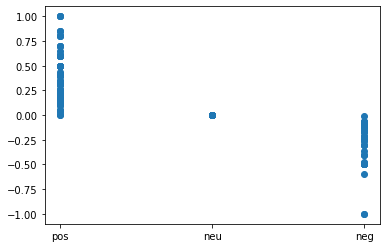

In [65]:
plt.scatter(api.scatter_y,api.scatter_x)

In [66]:
ele_x = [int(100*x) for x in api.scatter_x]

In [67]:
ele_y = [int(100-x) for x in ele_x]

In [72]:
arr=np.column_stack((api.scatter_y,ele_x))

In [79]:
df=pd.DataFrame(arr)

In [82]:
df

0   1
0    pos  15
1    pos   0
2    pos   5
3    pos  40
4    pos  10
..   ...  ..
295  pos  60
296  neu   0
297  neu   0
298  neu   0
299  neu   0

[300 rows x 2 columns]

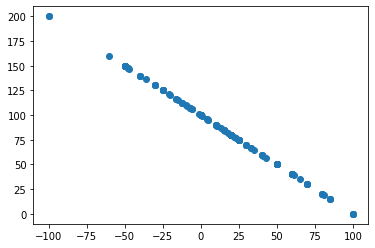

In [68]:
plt.scatter(ele_x,ele_y)

100

[85,
 100,
 95,
 60,
 90,
 100,
 0,
 100,
 88,
 140,
 116,
 130,
 100,
 100,
 148,
 100,
 125,
 50,
 100,
 100,
 80,
 100,
 50,
 79,
 100,
 150,
 84,
 125,
 100,
 106,
 80,
 100,
 125,
 100,
 100,
 100,
 100,
 200,
 100,
 100,
 115,
 100,
 77,
 20,
 140,
 150,
 80,
 84,
 95,
 100,
 100,
 130,
 109,
 100,
 95,
 100,
 86,
 200,
 112,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 66,
 100,
 100,
 100,
 100,
 107,
 75,
 75,
 100,
 100,
 100,
 125,
 80,
 100,
 150,
 100,
 150,
 125,
 100,
 75,
 100,
 100,
 90,
 100,
 101,
 100,
 100,
 100,
 100,
 100]